August: Animations of the V flux evolution at every section on the shelf break plane and the corresponding V velocity patterns.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from salishsea_tools.nc_tools import scDataset
from matplotlib import animation
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/transport_fluxes/')
import functions_transport_V
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

import warnings
warnings.filterwarnings("ignore")

In [2]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
filename = '1_mesh_mask.nc'
gdepv, vmask, mbathy, e1v, e3v_0 = functions_transport_V.get_variables_planes(dirname, filename)

In [3]:
ind_plane, ind_shelf, ind_bottom, ind_axis, ind_rimW, ind_rimE, ind_half, ind_shfW, ind_shfE,\
depth_shelf, depth_bottom, depth_half, area_j = functions_transport_V.get_indices_V(gdepv, vmask, mbathy, e1v, e3v_0)

ind_plane 178
ind_shelf 10
depth_shelf 91.875
ind_bottom 60
depth_bottom 534.672
ind_axis 110
ind_rimW 48
ind_rimE 172
ind_half 25
depth_half 223.125
ind_shfW 5
ind_shfE 215


In [4]:
filepattern = "1_MCKNZ_1h_20170101_20170120_*"
vomecrty = functions_transport_V.get_variables_fluxes(dirname, filepattern, ind_plane, vmask)

In [5]:
filesU = general_functions.get_files(dirname, filepattern, 'grid_U')
with scDataset(filesU) as dsU:
    sozotaux = dsU.variables['sozotaux'][:,0,0] 

In [6]:
Q_j_all = functions_transport_V.calculate_flux_V_evolution(vomecrty, area_j)

In [7]:
Q_j_shfW, Q_j_rimW, Q_j_rimE, Q_j_shfE, Q_j_topW, Q_j_topE, Q_j_botW, Q_j_botE = functions_transport_V.extract_sections(
    Q_j_all, ind_shelf, ind_bottom, ind_axis, ind_rimW, ind_rimE, ind_half, ind_shfW, ind_shfE)

In [8]:
axis = (1,2)
tot_Q_j_shfW, tot_Q_j_rimW, tot_Q_j_rimE, tot_Q_j_shfE, tot_Q_j_topW, tot_Q_j_topE, tot_Q_j_botW, tot_Q_j_botE = functions_transport_V.total_sections(
    axis, Q_j_shfW, Q_j_rimW, Q_j_rimE, Q_j_shfE, Q_j_topW, Q_j_topE, Q_j_botW, Q_j_botE)

In [9]:
time_ind = 50
fxn = 'anim'

In [10]:
def plot_flux_lines(ax, time_ind, fluxes, labels, colors):
    for flux, label, color in zip(fluxes, labels, colors):
        ax.plot(flux[:time_ind], label=label, c=color, lw=2)
    ax.legend(ncol = 8, loc=4, fontsize=16)
    ax.axhline(0, c='k', lw=2)
    ax.set_ylim([-200000, 200000])
    ax.set_xlim([0, len(flux)])
    ax.grid(b=True, which='major', color='gray', linestyle='-')
    ax.xaxis.grid(b=True, which='minor', color='gray', linestyle='-')
    ax.minorticks_on()
    return ax

In [11]:
def plot_axA(axA, time_ind, fxn):
    v_vel = vomecrty[time_ind,...]
    axA, xs, zs = general_functions.set_yz(axA, vomecrty)

    cs = axA.contour(xs, zs, v_vel, levels = levels, colors='k')
    axA.clabel(cs, inline=1, fontsize=10)

    cmap = plt.get_cmap(cm.RdBu_r)
    cmap.set_bad('wheat')
    P = axA.pcolormesh(xs, zs, v_vel, vmin = levels[0], vmax = levels[-1], cmap = cmap)

    if time_ind == 0 and fxn == 'anim':
        cbar = plt.colorbar(P, ax=axA, pad=0.1, orientation='horizontal', extend='both')
        cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=45)
    else:
        pass
    return cs,

In [12]:
def plot_ax1(ax1, time_ind):
    colors = ['dodgerblue', 'forestgreen', 'orangered', 'darkorchid']
    fluxes = [tot_Q_j_shfW, tot_Q_j_rimW, tot_Q_j_rimE, tot_Q_j_shfE]
    labels = ['shfW', 'rimW', 'rimE', 'shfE']
    ax1 = plot_flux_lines(ax1, time_ind, fluxes, labels, colors)
    return

def plot_ax2(ax2, time_ind):
    colors = ['dodgerblue', 'forestgreen', 'orangered', 'darkorchid']
    fluxes = [tot_Q_j_topW, tot_Q_j_topE, tot_Q_j_botW, tot_Q_j_botE]
    labels = ['topW', 'topE', 'botW', 'botE']
    ax2 = plot_flux_lines(ax2, time_ind, fluxes, labels, colors)
    return

In [13]:
def init():
    cs, = plot_axA(axA, 0, 'init')
    return cs,

In [14]:
def animate(time_ind):
    axA.cla(); ax1.cla(); ax2.cla(); axa.cla()
    
    cs, = plot_axA(axA, time_ind, 'anim')

    plot_ax1(ax1, time_ind)

    plot_ax2(ax2, time_ind)
    

    axa.plot(sozotaux[:time_ind], c='#384e72', linewidth=2.5)
    axa.set_xlim([0, sozotaux.shape[0]])
    axa.set_ylim(sozotaux.min(), sozotaux.max())


    axA.axhline(ind_shelf, c='k')
    axA.axhline(ind_bottom, c='k')
    axA.axvline(ind_axis, c='k')
    axA.axvline(ind_rimW, c='k')
    axA.axvline(ind_rimE, c='k')
    axA.axhline(ind_half, c='k')
    axA.axvline(ind_shfW, c='k')
    axA.axvline(ind_shfE, c='k')
    
    return cs,

[-0.2, -0.16, -0.11, -0.07, -0.02, 0.02, 0.07, 0.11, 0.16, 0.2]


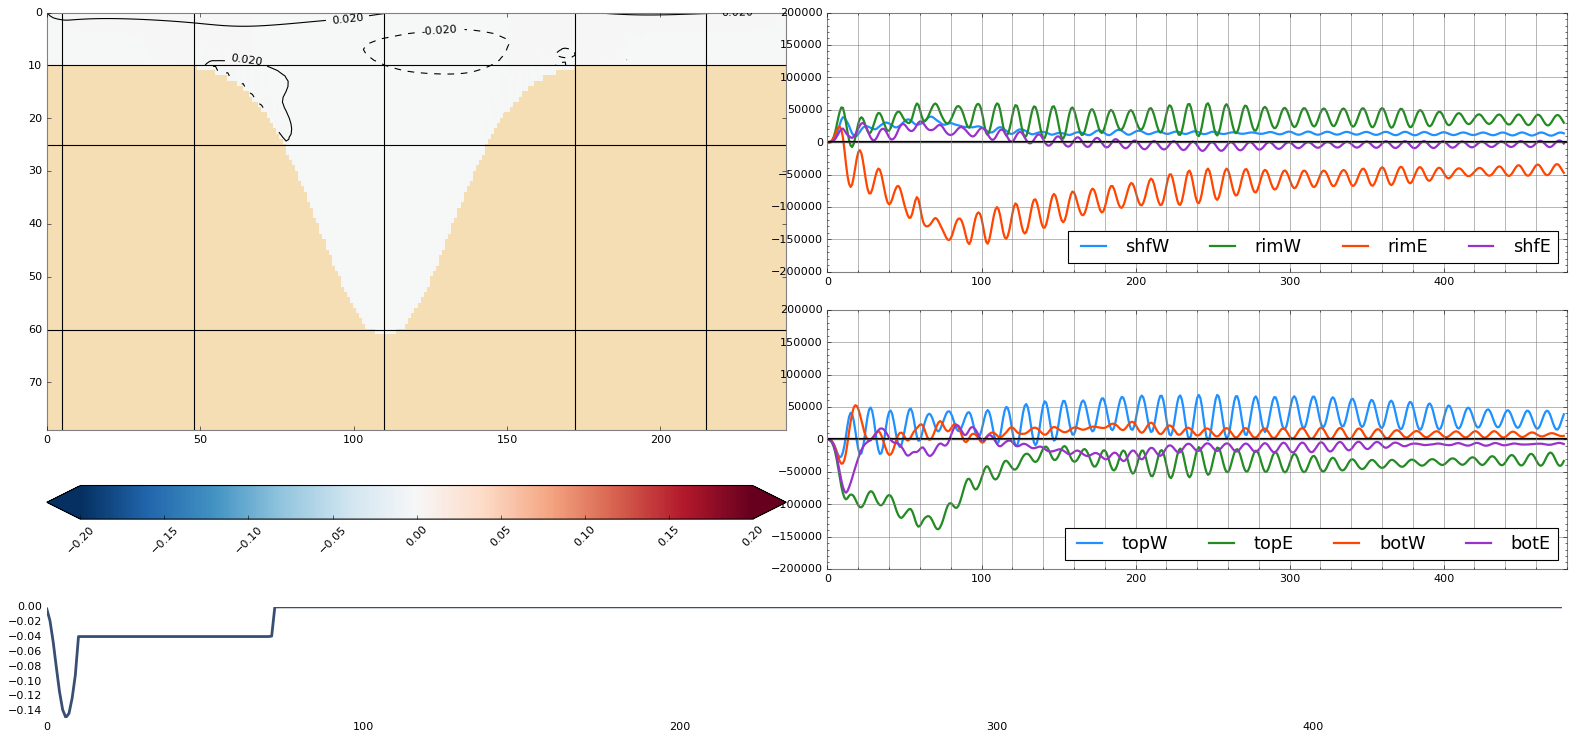

In [16]:
fig = plt.figure(figsize=(20, 10))
axA = plt.subplot2grid((10, 2), (0, 0), colspan=1, rowspan=8)
ax1 = plt.subplot2grid((10, 2), (0, 1), colspan=1, rowspan=4)
ax2 = plt.subplot2grid((10, 2), (4, 1), colspan=1, rowspan=4)
axa = plt.subplot2grid((10, 2), (8, 0), colspan=2, rowspan=2)

axes = [axA, ax1, ax2]
fig, axes, axa = general_functions.set_plots(fig, axes, axa)
vm_min, vm_max, levels = general_functions.get_limits(vomecrty, np.zeros(1), np.zeros(1), 1, 10, 'vel')

print(levels)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=3, bitrate=1000000, codec="libx264")
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=480)
anim.save('flux.mp4', writer=writer)